# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.278778e+01     1.396120e+01
 * time: 0.00427699089050293
     1     5.971420e+01     1.051556e+01
 * time: 0.012543916702270508
     2     5.480961e+01     1.468747e+01
 * time: 0.030464887619018555
     3     3.899945e+01     9.610046e+00
 * time: 0.055333852767944336
     4     3.046753e+01     8.856556e+00
 * time: 0.07980895042419434
     5     3.020496e+01     8.984317e+00
 * time: 0.10133695602416992
     6     1.611365e+01     5.261497e+00
 * time: 0.12897682189941406
     7     1.312833e+01     4.343429e+00
 * time: 0.2214338779449463
     8     1.050937e+01     7.109487e+00
 * time: 0.2361588478088379
     9     8.759947e+00     3.818951e+00
 * time: 0.2540318965911865
    10     7.330398e+00     2.711856e+00
 * time: 0.27204298973083496
    11     6.490216e+00     2.543686e+00
 * time: 0.2873048782348633
    12     6.066946e+00     1.743423e+00
 * time: 0.3026700019836426
    13     5.905592e+00     1.114688e+00
 * time: 0

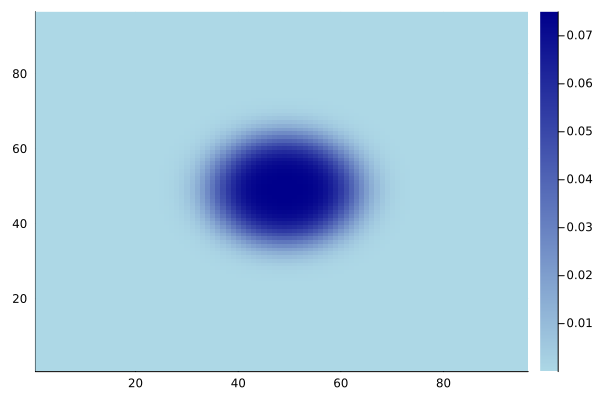

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)